# Text Mining and Insights
## Intro
#### In this task, at first, the key words in some important novels and letters were identified, examined and compared.<br>Then, the data of some TED lectures were reviewed and topic modeling was done on them.<br>At the end, the data in a survey was discovered and analyzed

In [1]:
import PyPDF2

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf

from nltk.stem.snowball import SnowballStemmer

import string

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Functions

In [2]:
sw_add = ['s', 'will', 'one', 'hi', 'wa', 'the', 'thi', 'ha', 'ani']
sw_add_concern = ['s', 'will', 'one', 'hi', 'wa', 'the', 'thi', 'ha','global', 'country', 'year', 'u', 'ss', 'countri', 'world',
              'climat', 'record', 'us']

In [3]:
def Plot_world(text, sw_add):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    sw_list = list(stopwords)
    
    sw_list.extend(sw_add)
    
    lemmatizer = WordNetLemmatizer()
    
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 
        
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            lemmetized_word = lemmatizer.lemmatize(tokens[i].lower())
            tokens[i] = lemmetized_word
            

        for words in tokens: 
            comment_words = comment_words + words + ' '
            
        
    wordcloud = WordCloud(width = 2000, height = 1000, 
                    background_color ='white', 
                    stopwords = sw_list, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [4]:
def listToSting(s):
    
    t = ""
    
    for ele in s:
        if (isinstance(ele, str)):
            t += ele.lower()
        
    return t

In [5]:
def count_in_list(item_to_count, list_to_search):
    "Counts the number of a specified word within a list of words"
    number_of_hits = 0
    for item in list_to_search:
        if item == item_to_count:
            number_of_hits += 1
    return number_of_hits

In [6]:
def remove_Space(text):
    new_string = []
    for s in text:
        new_string.append(' '.join(s.split()))
    return new_string

In [7]:
def punctuation(text):
    new_string = []
    for s in text:
        new_string.append(s.translate(str.maketrans('', '', string.punctuation)))
    return new_string

## charlie chaplin letter to his daughter

In [8]:
f = open('Charlie.pdf','rb')

In [9]:
pdf_text = []

pdf_reader = PyPDF2.PdfFileReader(f)

for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    
    pdf_text.append(page.extractText())

f.close()

In [10]:
remove_Space(pdf_text)
punctuation(pdf_text)

['My girl  \nNow it is night One Christmas night All unarmed wars in my little castle slept Not awake or \nyour brother or your sister Even your mother now sleeps Not only woke up zaspalite birds until \nhe came to this polusvetla room  \nI am far from you But let oslepeya if even for a moment your portrait has disappeared from my \neyes It was here – on the table here – to my heart But where are you There  – prikazniya in \nParis of the magnificent dance theater scene Shan h Elize I know that like in a quiet night you \nhear footsteps to see your eyes shining like stars in the winter darkness I heard that your role in \nthis party and light show is the role  of Persian Beauty captive from Tatar Khan Be fair and \ndance Be a star and siyay But if vaztorzite and they thanked the audience intoxicated if the \nflavor of flowers sent to you they zamae you sit in a corner read my letter and listen to the \nvoice of his father  \nI am your father Zheraldin  \nI’m Charlie Charlie Chaplin  \nY

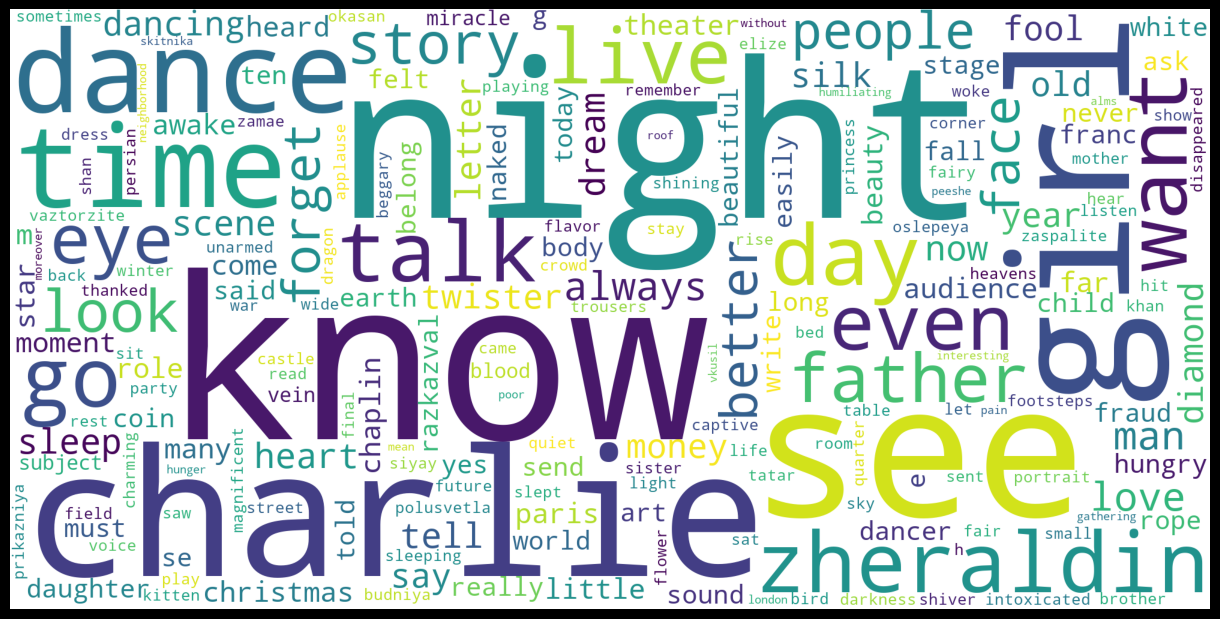

In [11]:
Plot_world(pdf_text, sw_add)

In [12]:
text = listToSting(pdf_text)

In [13]:
words = text.split()

In [14]:
print ("Instances of the word \'zheraldin\':", (count_in_list("zheraldin", words)))

Instances of the word 'zheraldin': 3


## Me Before You

In [15]:
f = open('me before you.pdf','rb')

In [16]:
pdf_text = []

pdf_reader = PyPDF2.PdfFileReader(f)

for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    
    pdf_text.append(page.extractText())


In [17]:
pdf_reader.numPages

371

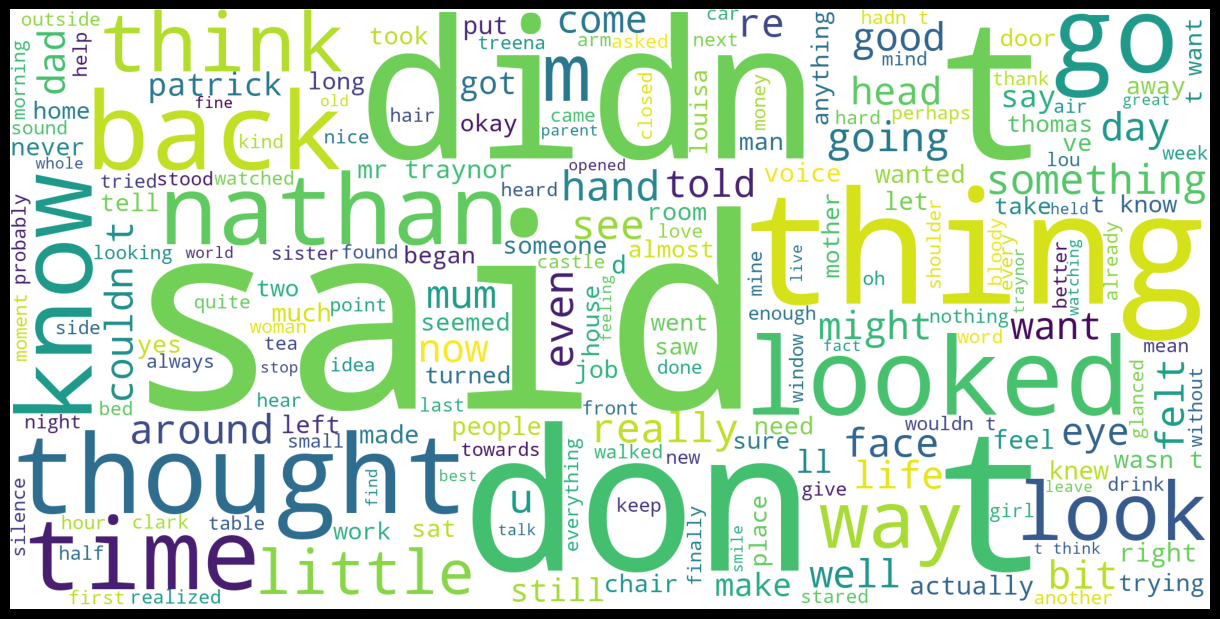

In [18]:
Plot_world(pdf_text, sw_add)

In [19]:
text = listToSting(pdf_text)

In [20]:
words = text.split()

In [21]:
print ("Instances of the word \'look\':", (count_in_list("look", words)))

Instances of the word 'look': 187


## Hazrat Ali's Famous Epistle Malik Ashtar

In [22]:
f = open('Hazrat_Ali\'s_Famous_Epistle_Malik_Ashtar.pdf','rb')

In [23]:
pdf_text = []

pdf_reader = PyPDF2.PdfFileReader(f)

for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    
    pdf_text.append(page.extractText())


In [24]:
pdf_reader.numPages

13

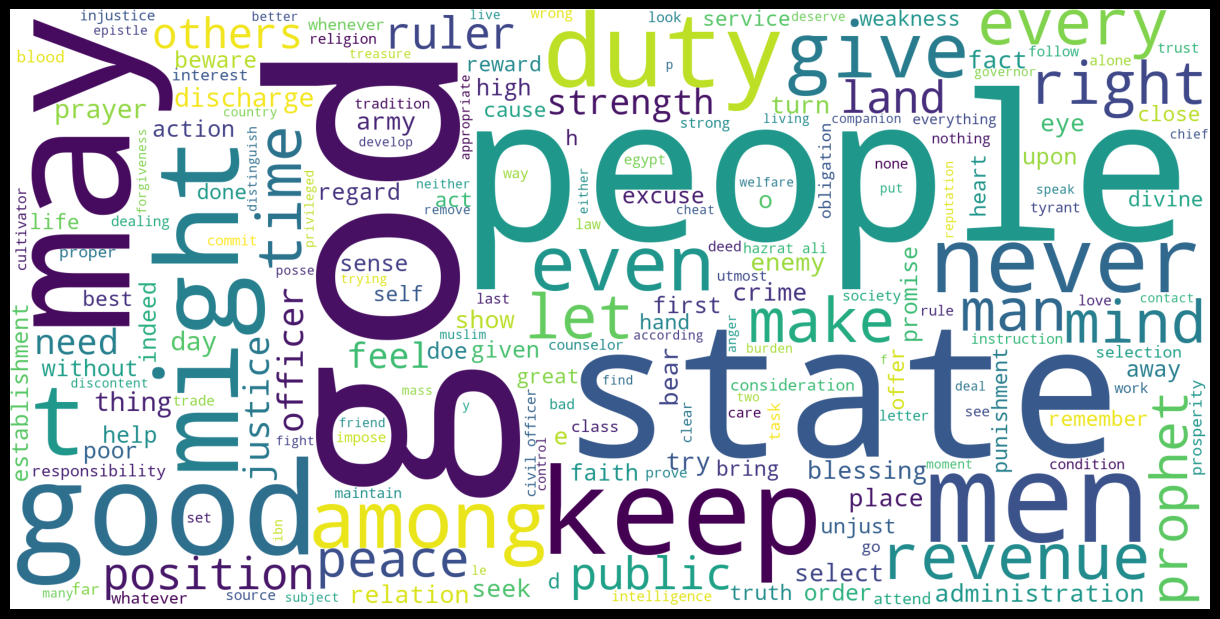

In [25]:
Plot_world(pdf_text, sw_add)

In [26]:
text = listToSting(pdf_text)

In [27]:
words = text.split()

In [28]:
print ("Instances of the word \'god\':", (count_in_list("god", words)))

Instances of the word 'god': 43


In [29]:
print ("Instances of the word \'malik\':", (count_in_list("malik", words)))

Instances of the word 'malik': 3


## Florence Scovel Shinn

In [30]:
f = open('The_Complete_Works_of_Florence_Scovel_Shinn.pdf','rb')

In [31]:
pdf_text = []

pdf_reader = PyPDF2.PdfFileReader(f)

for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    
    pdf_text.append(page.extractText())


In [32]:
pdf_reader.numPages

299

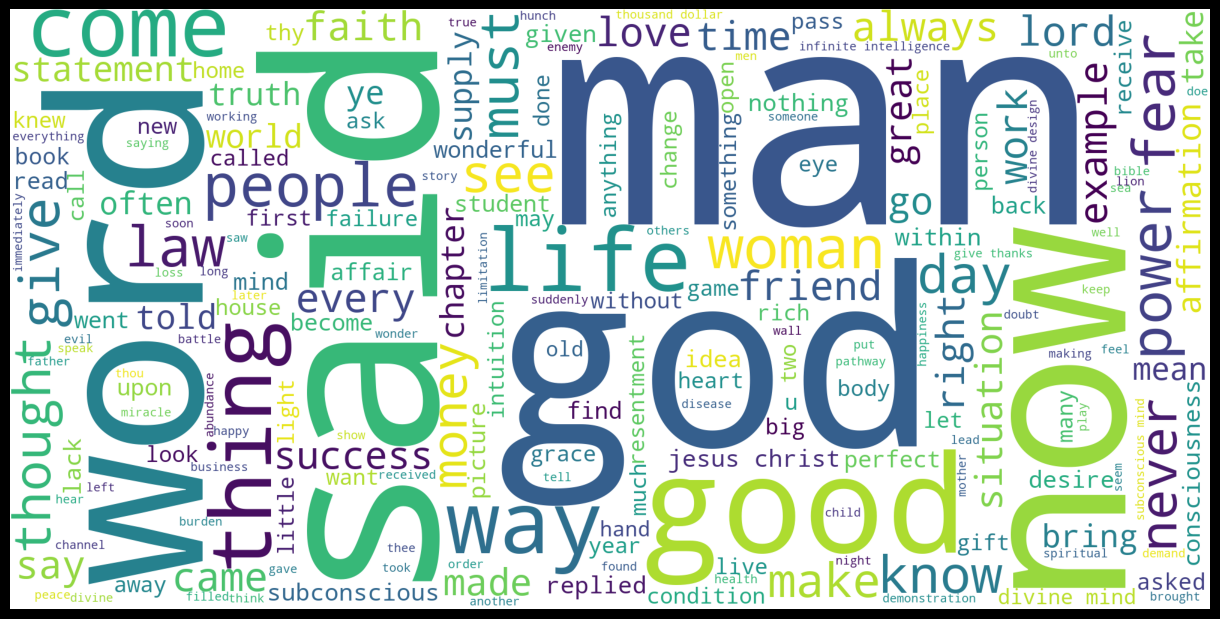

In [33]:
Plot_world(pdf_text, sw_add)

In [34]:
text = listToSting(pdf_text)

In [35]:
words = text.split()

In [36]:
print ("Instances of the word \'god\':", (count_in_list("god", words)))

Instances of the word 'god': 182


## Way of Wolf

In [37]:
f = open('Way of the Wolf.pdf','rb')

In [38]:
pdf_text = []

pdf_reader = PyPDF2.PdfFileReader(f)

for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    
    pdf_text.append(page.extractText())


In [39]:
pdf_reader.numPages

188

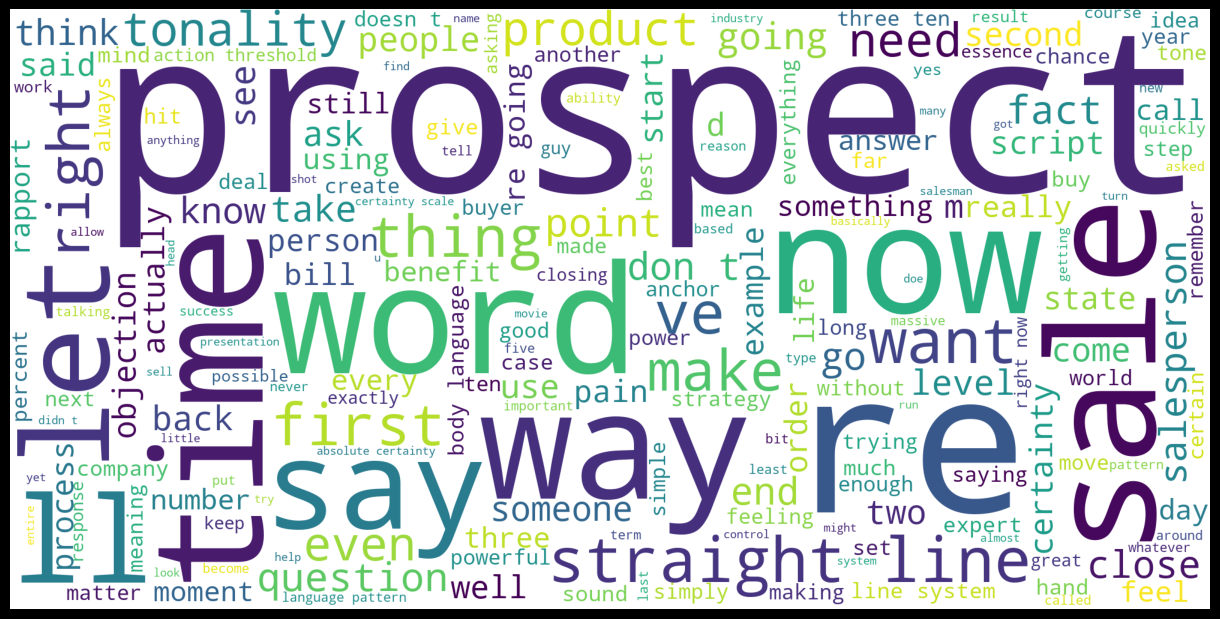

In [40]:
Plot_world(pdf_text, sw_add)

In [41]:
text = listToSting(pdf_text)

In [42]:
words = text.split()

In [43]:
print ("Instances of the word \'prospect\':", (count_in_list("prospect", words)))

Instances of the word 'prospect': 319


## In the following, the contents of the articles related to the last three years (2020, 2021,2022) were reviewed on the earth.org site:

## World Enviroment news in 2020

In [44]:
f = open('world concern 2020.pdf','rb')

In [45]:
pdf_text = []

pdf_reader = PyPDF2.PdfFileReader(f)

for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    
    pdf_text.append(page.extractText())

f.close()

In [46]:
remove_Space(pdf_text)
punctuation(pdf_text)

['Temperatures keep rising despite COVID 19 emission cuts and international efforts to comply \nwith the Paris Agreement 2020 officially tied 2016 as the hottest year on record since these \nbegan in the 1800s “It’s gotten to t he point where these intense heat waves would not be \npossible in any reasonable amount of time in a non human perturbed climate”   \n– NASA Goddard Institute for Space Studies GISS Director Gavin Schmidt ref 1  \n \nThe 2016 2020 average anomalies of global surface air temperatures relative to the 1951 1980 \naverage in degrees Fahrenheit Blue areas are cooler than average and yellow and red are \nwarmer Source NASA Scientific Visualization Studio NASAGISS  \nThe NASA Global Climate Change website lists Global Temperature  as one of the planet’s vital \nsigns This means that even before considering the ripple effects of warmer global air \ntemperatures the high numbers on monitoring sites all over and across Earth’s surface \nthemselves indicate that something

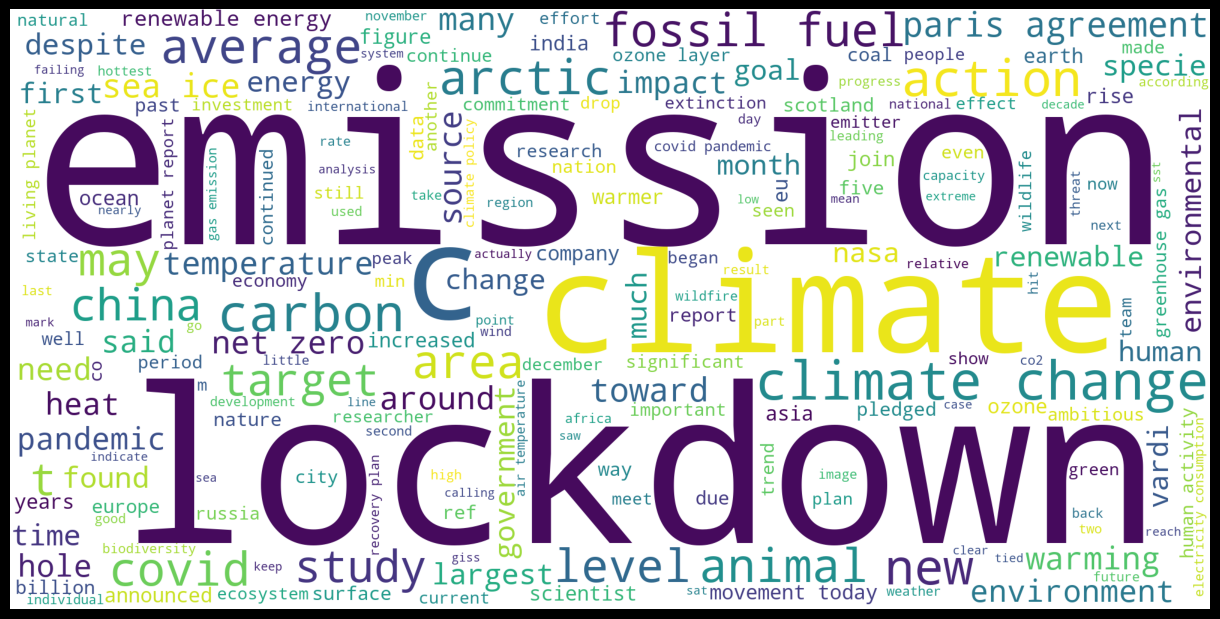

In [47]:
Plot_world(pdf_text, sw_add_concern)

In [48]:
text = listToSting(pdf_text)

In [49]:
words = text.split()

In [50]:
print ("Instances of the word \'covid\':", (count_in_list("covid", words)))

Instances of the word 'covid': 21


## World Enviroment news in 2021

In [51]:
f = open('world concern 2021.pdf','rb')

In [52]:
pdf_text = []

pdf_reader = PyPDF2.PdfFileReader(f)

for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    
    pdf_text.append(page.extractText())

f.close()

In [53]:
remove_Space(pdf_text)
punctuation(pdf_text)

['The Biggest Climate Change Events in 2021  \nby Olivia Lai  Africa  Americas  Asia Europe  Global Commons  Middle East  Oceania  Dec 31st 20216 mins  \n \n2021 was another challenging year While the COVID 19 pandemic continues to loom 2021 \nwas also a year filled with unpre cedented climate and weather extremes For some the \neffects of climate change have been made clear by what we experienced this year But for \nmost it has been an undeniable sign that we are charging towards the tipping point of the \nclimate crisis World l eaders gathered at COP26 the UN climate summit put their heads \ntogether to set out collective pathways to reduce greenhouse gas emissions managing only \nto agree upon “phasing down” coal and setting down rules for a global carbon market \nThis is the deci sive decade to fight the climate crisis and we can strive to do a lot more We \ntake a look back at some of the biggest climate change events in 2021 and hopefully \nencourage and galvanise greater climate

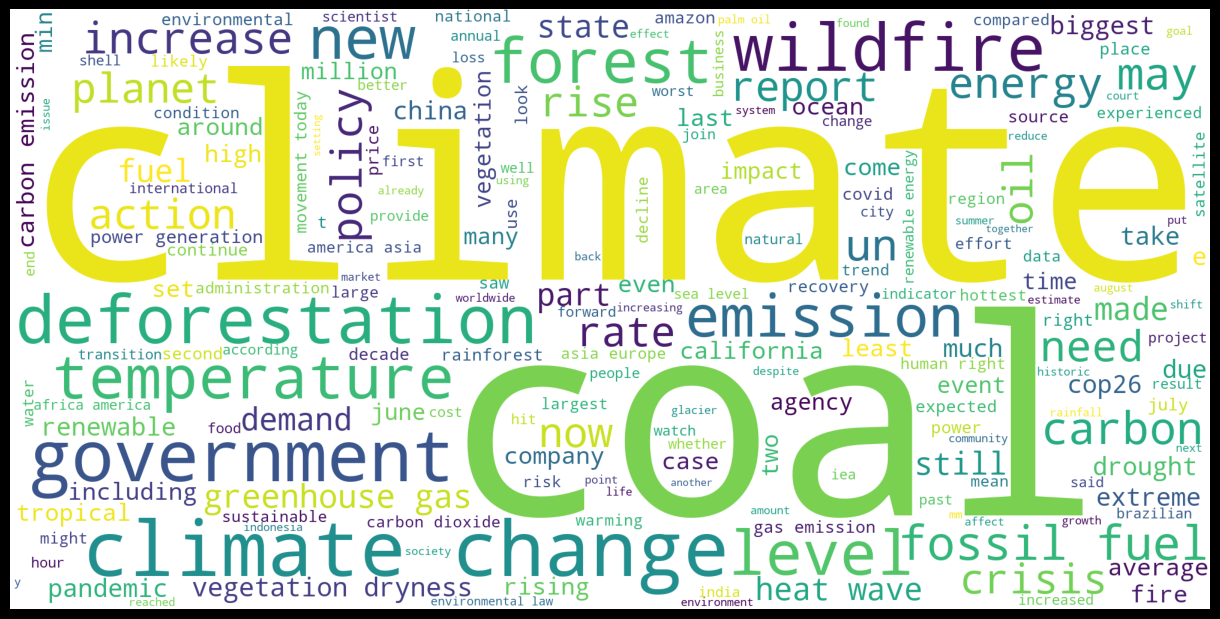

In [54]:
Plot_world(pdf_text, sw_add_concern)

In [55]:
text = listToSting(pdf_text)

In [56]:
words = text.split()

In [57]:
print ("Instances of the word \'covid\':", (count_in_list("covid", words)))

Instances of the word 'covid': 16


## World Enviroment news in 2022

In [58]:
f = open('world concern 2022.pdf','rb')

In [59]:
pdf_text = []

pdf_reader = PyPDF2.PdfFileReader(f)

for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    
    pdf_text.append(page.extractText())

f.close()

In [60]:
remove_Space(pdf_text)
punctuation(pdf_text)

['Top 6 Environmental Issues in the US in 2022  \nCRISIS  Atmospheric CO2 Levels  CRISIS  Pollution Crises  by Martina Igini  Americas  Aug 30th 202211 \nmins  \n \nAs the latest IPCC report warned it is ‘now or never’  to limit global warming bel ow 15C \nCountries around the world are already bearing the brunt of climate change but the reality \nis that unless we reverse this trend the effects that we are going to experience in the near \nfuture are going to be significantly more devastating The US  is certainly not spared by \nglobal warming From north to south from east to west all of its states are affected by \npollution and extreme weather events in some shape or form Here are the top \nenvironmental issues in North America and what the government  is doing to tackle them   \n– \nTop Environmental Issues in the US in 2022  \n1 Air Pollution  \nAs the world’s second largest emitter of carbon dioxide preceded only by China it comes as no \nsurprise that air pollution is one of the

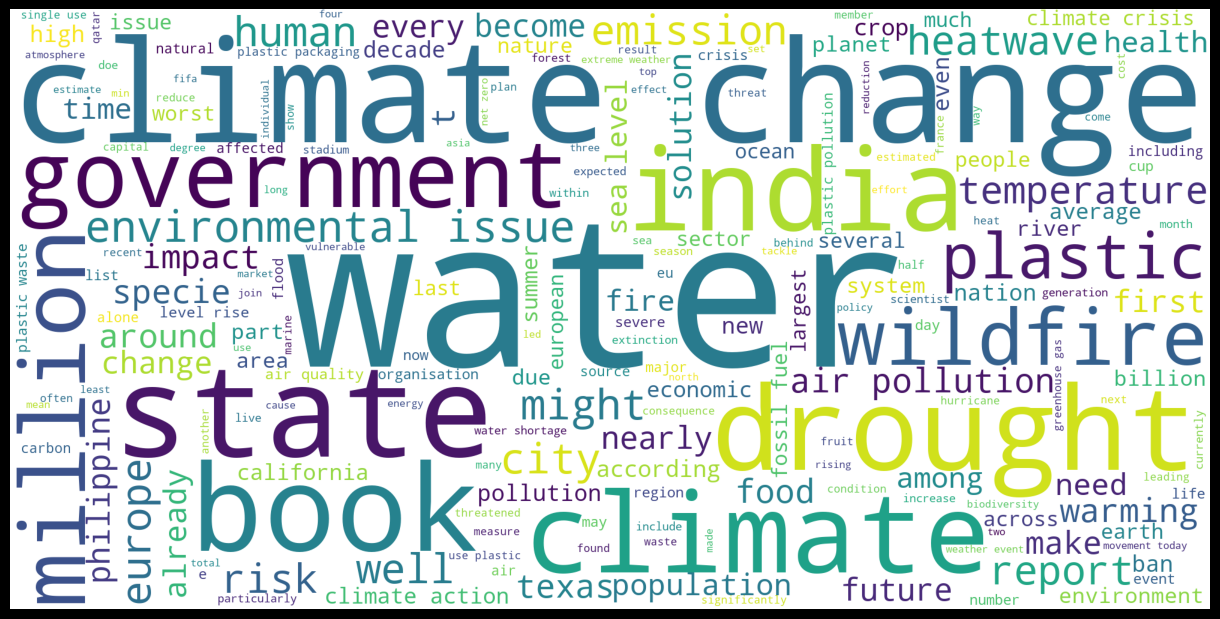

In [61]:
Plot_world(pdf_text, sw_add_concern)

In [62]:
text = listToSting(pdf_text)

In [63]:
words = text.split()

In [64]:
print ("Instances of the word \'covid\':", (count_in_list("covid", words)))

Instances of the word 'covid': 2


## Result

### The most repeated words in the field of environment in the last three years are as follows:

#### 2020: Lockdown
#### 2021: Coal
#### 2022: Water

## Ted Talk
### Some cleaning and merging

In [65]:
talk_data = pd.read_csv('C:/Users/Amirhosain/Desktop/Ted Talk Data/talk_data.csv')

In [66]:
talk_data.head()

talk_desc                    event  \
0  It's 1997. The United States Senate has called...                   TED-Ed   
1  Colleges and universities in the US make billi...               TEDxDayton   
2  In a dark cave, bats can't see much. But even ...                   TED-Ed   
3  With candor and cunning, sex historian Kate Li...  TEDxUniversityofGlasgow   
4  DNA isn't the only builder in the biological w...                 TED2020    

                                          talk_name   views  duration  \
0  Can you outsmart the apples and oranges fallacy?  119359       327   
1           The exploitation of US college athletes  438573       611   
2                         How does ultrasound work?  140874       295   
3  An honest history of an ancient and "nasty" word  569477      1148   
4   The electrical blueprints that orchestrate life  122682      1176   

                                                tags  \
0  ['education', 'psychology', 'animation', 'TED-...   
1  ['sports', 'law', 'education', 'United States'...   
2  ['education', 'technology', 'animation', 'TED-...   
3  ['sex', 'language', 'ancient world', 'history'...   
4  ['biology', 'science', 'invention', 'robots', ...   

                     recorded_at  published on  
0  2021-04-05T00:00:00.000+00:00    1617636753  
1  2020-11-10T00:00:00.000+00:00    1617634131  
2  2021-04-01T00:00:00.000+00:00    1617290223  
3  2020-03-06T00:00:00.000+00:00    1617289565  
4  2020-05-18T00:00:00.000+00:00    1617213773

In [67]:
speaker_data = pd.read_csv('C:/Users/Amirhosain/Desktop/Ted Talk Data/speaker_data.csv')

In [68]:
speaker_data.head()

talk             speaker  \
0  Can you outsmart the apples and oranges fallacy?       Elizabeth Cox   
1           The exploitation of US college athletes          Tim Nevius   
2                         How does ultrasound work?  Jacques Abramowicz   
3  An honest history of an ancient and "nasty" word         Kate Lister   
4   The electrical blueprints that orchestrate life       Michael Levin   

  speaker_title            speaker_occ  \
0           NaN                    NaN   
1           NaN  College sports lawyer   
2           NaN                    NaN   
3           NaN          Sex historian   
4           NaN   Bioelectric explorer   

                                         speaker_bio  
0                                                NaN  
1  Tim Nevius is a leading sports lawyer and coll...  
2                                                NaN  
3  Kate Lister is a sex historian and lecturers a...  
4  Michael Levin's research could give rise to ad...

In [69]:
transcript_data = pd.read_csv('C:/Users/Amirhosain/Desktop/Ted Talk Data/transcript_data.csv')

In [70]:
transcript_data.head()

title  \
0  Can you outsmart the apples and oranges fallacy?   
1           The exploitation of US college athletes   
2                         How does ultrasound work?   
3  An honest history of an ancient and "nasty" word   
4   The electrical blueprints that orchestrate life   

                                          transcript  
0  Baking apple pie? Discount orange warehouse ha...  
1  In college sports, American universities are e...  
2  In a pitch-black cave, bats can’t see much. Bu...  
3  First, a warning. As far as offensive words go...  
4  Chris Anderson: Mike, welcome. It's good to se...

In [71]:
merged_inner = pd.merge(left=transcript_data, right=speaker_data, left_on='title', right_on='talk')

In [72]:
merged_inner

title  \
0     Can you outsmart the apples and oranges fallacy?   
1              The exploitation of US college athletes   
2                            How does ultrasound work?   
3     An honest history of an ancient and "nasty" word   
4      The electrical blueprints that orchestrate life   
...                                                ...   
4373                   The best stats you've ever seen   
4374                       Do schools kill creativity?   
4375                               Greening the ghetto   
4376                                  Simplicity sells   
4377                       Averting the climate crisis   

                                             transcript  \
0     Baking apple pie? Discount orange warehouse ha...   
1     In college sports, American universities are e...   
2     In a pitch-black cave, bats can’t see much. Bu...   
3     First, a warning. As far as offensive words go...   
4     Chris Anderson: Mike, welcome. It's good to se...   
...                                                 ...   
4373  About 10 years ago, I took on the task to teac...   
4374  Good morning. How are you?(Audience) Good.It's...   
4375  If you're here today — and I'm very happy that...   
4376  (Music: "The Sound of Silence," Simon &amp; Ga...   
4377  Thank you so much, Chris. And it's truly a gre...   

                                                  talk             speaker  \
0     Can you outsmart the apples and oranges fallacy?       Elizabeth Cox   
1              The exploitation of US college athletes          Tim Nevius   
2                            How does ultrasound work?  Jacques Abramowicz   
3     An honest history of an ancient and "nasty" word         Kate Lister   
4      The electrical blueprints that orchestrate life       Michael Levin   
...                                                ...                 ...   
4373                   The best stats you've ever seen        Hans Rosling   
4374                       Do schools kill creativity?    Sir Ken Robinson   
4375                               Greening the ghetto       Majora Carter   
4376                                  Simplicity sells         David Pogue   
4377                       Averting the climate crisis             Al Gore   

     speaker_title                           speaker_occ  \
0              NaN                                   NaN   
1              NaN                 College sports lawyer   
2              NaN                                   NaN   
3              NaN                         Sex historian   
4              NaN                  Bioelectric explorer   
...            ...                                   ...   
4373           NaN  Global health expert; data visionary   
4374           NaN                      Author, educator   
4375           NaN    Activist for environmental justice   
4376           NaN                  Technology columnist   
4377           NaN                      Climate advocate   

                                            speaker_bio  
0                                                   NaN  
1     Tim Nevius is a leading sports lawyer and coll...  
2                                                   NaN  
3     Kate Lister is a sex historian and lecturers a...  
4     Michael Levin's research could give rise to ad...  
...                                                 ...  
4373  In Hans Rosling’s hands, data sings. Global tr...  
4374  Creativity expert Sir Ken Robinson challenged ...  
4375  Majora Carter redefined the field of environme...  
4376  David Pogue is the personal technology columni...  
4377  Nobel Laureate Al Gore focused the world's att...  

[4378 rows x 7 columns]

In [73]:
raw_data = pd.merge(left=merged_inner, right=talk_data, left_on='title', right_on='talk_name')

In [74]:
raw_data.head(5)

title  \
0  Can you outsmart the apples and oranges fallacy?   
1           The exploitation of US college athletes   
2                         How does ultrasound work?   
3  An honest history of an ancient and "nasty" word   
4   The electrical blueprints that orchestrate life   

                                          transcript  \
0  Baking apple pie? Discount orange warehouse ha...   
1  In college sports, American universities are e...   
2  In a pitch-black cave, bats can’t see much. Bu...   
3  First, a warning. As far as offensive words go...   
4  Chris Anderson: Mike, welcome. It's good to se...   

                                               talk             speaker  \
0  Can you outsmart the apples and oranges fallacy?       Elizabeth Cox   
1           The exploitation of US college athletes          Tim Nevius   
2                         How does ultrasound work?  Jacques Abramowicz   
3  An honest history of an ancient and "nasty" word         Kate Lister   
4   The electrical blueprints that orchestrate life       Michael Levin   

  speaker_title            speaker_occ  \
0           NaN                    NaN   
1           NaN  College sports lawyer   
2           NaN                    NaN   
3           NaN          Sex historian   
4           NaN   Bioelectric explorer   

                                         speaker_bio  \
0                                                NaN   
1  Tim Nevius is a leading sports lawyer and coll...   
2                                                NaN   
3  Kate Lister is a sex historian and lecturers a...   
4  Michael Levin's research could give rise to ad...   

                                           talk_desc                    event  \
0  It's 1997. The United States Senate has called...                   TED-Ed   
1  Colleges and universities in the US make billi...               TEDxDayton   
2  In a dark cave, bats can't see much. But even ...                   TED-Ed   
3  With candor and cunning, sex historian Kate Li...  TEDxUniversityofGlasgow   
4  DNA isn't the only builder in the biological w...                 TED2020    

                                          talk_name   views  duration  \
0  Can you outsmart the apples and oranges fallacy?  119359       327   
1           The exploitation of US college athletes  438573       611   
2                         How does ultrasound work?  140874       295   
3  An honest history of an ancient and "nasty" word  569477      1148   
4   The electrical blueprints that orchestrate life  122682      1176   

                                                tags  \
0  ['education', 'psychology', 'animation', 'TED-...   
1  ['sports', 'law', 'education', 'United States'...   
2  ['education', 'technology', 'animation', 'TED-...   
3  ['sex', 'language', 'ancient world', 'history'...   
4  ['biology', 'science', 'invention', 'robots', ...   

                     recorded_at  published on  
0  2021-04-05T00:00:00.000+00:00    1617636753  
1  2020-11-10T00:00:00.000+00:00    1617634131  
2  2021-04-01T00:00:00.000+00:00    1617290223  
3  2020-03-06T00:00:00.000+00:00    1617289565  
4  2020-05-18T00:00:00.000+00:00    1617213773

In [75]:
data = raw_data.drop(['talk', 'talk_name'], axis=1)

In [76]:
data.head(5)

title  \
0  Can you outsmart the apples and oranges fallacy?   
1           The exploitation of US college athletes   
2                         How does ultrasound work?   
3  An honest history of an ancient and "nasty" word   
4   The electrical blueprints that orchestrate life   

                                          transcript             speaker  \
0  Baking apple pie? Discount orange warehouse ha...       Elizabeth Cox   
1  In college sports, American universities are e...          Tim Nevius   
2  In a pitch-black cave, bats can’t see much. Bu...  Jacques Abramowicz   
3  First, a warning. As far as offensive words go...         Kate Lister   
4  Chris Anderson: Mike, welcome. It's good to se...       Michael Levin   

  speaker_title            speaker_occ  \
0           NaN                    NaN   
1           NaN  College sports lawyer   
2           NaN                    NaN   
3           NaN          Sex historian   
4           NaN   Bioelectric explorer   

                                         speaker_bio  \
0                                                NaN   
1  Tim Nevius is a leading sports lawyer and coll...   
2                                                NaN   
3  Kate Lister is a sex historian and lecturers a...   
4  Michael Levin's research could give rise to ad...   

                                           talk_desc                    event  \
0  It's 1997. The United States Senate has called...                   TED-Ed   
1  Colleges and universities in the US make billi...               TEDxDayton   
2  In a dark cave, bats can't see much. But even ...                   TED-Ed   
3  With candor and cunning, sex historian Kate Li...  TEDxUniversityofGlasgow   
4  DNA isn't the only builder in the biological w...                 TED2020    

    views  duration                                               tags  \
0  119359       327  ['education', 'psychology', 'animation', 'TED-...   
1  438573       611  ['sports', 'law', 'education', 'United States'...   
2  140874       295  ['education', 'technology', 'animation', 'TED-...   
3  569477      1148  ['sex', 'language', 'ancient world', 'history'...   
4  122682      1176  ['biology', 'science', 'invention', 'robots', ...   

                     recorded_at  published on  
0  2021-04-05T00:00:00.000+00:00    1617636753  
1  2020-11-10T00:00:00.000+00:00    1617634131  
2  2021-04-01T00:00:00.000+00:00    1617290223  
3  2020-03-06T00:00:00.000+00:00    1617289565  
4  2020-05-18T00:00:00.000+00:00    1617213773

In [77]:
data.isnull().sum()

title               0
transcript          0
speaker             4
speaker_title    7158
speaker_occ       810
speaker_bio       786
talk_desc           0
event               0
views               0
duration            0
tags                0
recorded_at         0
published on        0
dtype: int64

In [78]:
len(data)

7167

In [79]:
data['recorded_at'] = pd.to_datetime(data['recorded_at'])

In [80]:
data['year'] = data['recorded_at'].dt.year

In [81]:
data['month'] = data['recorded_at'].dt.month

In [82]:
data.head(5)

title  \
0  Can you outsmart the apples and oranges fallacy?   
1           The exploitation of US college athletes   
2                         How does ultrasound work?   
3  An honest history of an ancient and "nasty" word   
4   The electrical blueprints that orchestrate life   

                                          transcript             speaker  \
0  Baking apple pie? Discount orange warehouse ha...       Elizabeth Cox   
1  In college sports, American universities are e...          Tim Nevius   
2  In a pitch-black cave, bats can’t see much. Bu...  Jacques Abramowicz   
3  First, a warning. As far as offensive words go...         Kate Lister   
4  Chris Anderson: Mike, welcome. It's good to se...       Michael Levin   

  speaker_title            speaker_occ  \
0           NaN                    NaN   
1           NaN  College sports lawyer   
2           NaN                    NaN   
3           NaN          Sex historian   
4           NaN   Bioelectric explorer   

                                         speaker_bio  \
0                                                NaN   
1  Tim Nevius is a leading sports lawyer and coll...   
2                                                NaN   
3  Kate Lister is a sex historian and lecturers a...   
4  Michael Levin's research could give rise to ad...   

                                           talk_desc                    event  \
0  It's 1997. The United States Senate has called...                   TED-Ed   
1  Colleges and universities in the US make billi...               TEDxDayton   
2  In a dark cave, bats can't see much. But even ...                   TED-Ed   
3  With candor and cunning, sex historian Kate Li...  TEDxUniversityofGlasgow   
4  DNA isn't the only builder in the biological w...                 TED2020    

    views  duration                                               tags  \
0  119359       327  ['education', 'psychology', 'animation', 'TED-...   
1  438573       611  ['sports', 'law', 'education', 'United States'...   
2  140874       295  ['education', 'technology', 'animation', 'TED-...   
3  569477      1148  ['sex', 'language', 'ancient world', 'history'...   
4  122682      1176  ['biology', 'science', 'invention', 'robots', ...   

                recorded_at  published on  year  month  
0 2021-04-05 00:00:00+00:00    1617636753  2021      4  
1 2020-11-10 00:00:00+00:00    1617634131  2020     11  
2 2021-04-01 00:00:00+00:00    1617290223  2021      4  
3 2020-03-06 00:00:00+00:00    1617289565  2020      3  
4 2020-05-18 00:00:00+00:00    1617213773  2020      5

## Topic Modeling for TED
### The topics of this data are obtained in two ways:

### Latent Dirichlet Allocation

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [85]:
dtm = cv.fit_transform(data['transcript'])

In [86]:
dtm

<7167x39920 sparse matrix of type '<class 'numpy.int64'>'
	with 3991820 stored elements in Compressed Sparse Row format>

In [87]:
from sklearn.decomposition import LatentDirichletAllocation

In [88]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)

In [89]:
# This can take awhile, we're dealing with a large amount of documents!
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [90]:
len(cv.get_feature_names())

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



39920

In [91]:
import random

In [92]:
for i in range(10):
    random_word_id = random.randint(0,39919)
    print(cv.get_feature_names()[random_word_id])

teflon
shia
cowardice
nabokov
lacy
forgiving
skirt
zen
whyte
schumpeter


In [93]:
for i in range(10):
    random_word_id = random.randint(0,39919)
    print(cv.get_feature_names()[random_word_id])

carey
release
thc
grandstand
airplane
shouldn
microwaves
reversal
heyday
primers


In [94]:
len(LDA.components_)

7

In [95]:
LDA.components_

array([[6.16913871e+00, 3.25883973e+03, 2.14104858e+00, ...,
        2.14109540e+00, 5.14210766e+00, 1.57182137e+00],
       [1.42874642e-01, 3.76427794e+03, 1.43131448e-01, ...,
        1.42857145e-01, 1.43037419e-01, 1.43054915e-01],
       [2.91161159e+01, 4.83881118e+01, 1.44047524e-01, ...,
        1.43999384e-01, 1.43147177e-01, 9.71341187e+00],
       ...,
       [1.43038812e-01, 1.89813122e+03, 1.43083145e-01, ...,
        1.42880237e-01, 1.42966104e-01, 1.43007334e-01],
       [1.42914894e-01, 6.91415632e+02, 1.42857145e-01, ...,
        1.42982612e-01, 1.42890588e-01, 1.42857145e-01],
       [1.42897270e-01, 1.72289847e+03, 1.42920930e-01, ...,
        1.43125386e-01, 1.42886169e-01, 1.42917194e-01]])

In [96]:
len(LDA.components_[0])

39920

In [97]:
single_topic = LDA.components_[0]

In [98]:
single_topic.argsort()

array([15616, 19826,  8657, ..., 26027, 39489, 20773], dtype=int64)

In [99]:
single_topic[19826]

0.14285714290210916

In [100]:
single_topic[20773]

16736.627324158657

In [101]:
top_word_indices = single_topic.argsort()[-10:]

In [102]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

make
think
really
life
time
years
just
people
world
like


In [103]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['africa', 'war', 'need', 'actually', 'know', 'make', 'think', 'really', 'life', 'time', 'years', 'just', 'people', 'world', 'like']


THE TOP 15 WORDS FOR TOPIC #1
['want', 'country', 'device', 'aims', 'brain', 'll', 'like', 'health', 've', 'percent', 'going', 'world', 'heart', 'africa', 'people']


THE TOP 15 WORDS FOR TOPIC #2
['day', 'things', 'right', 'think', 've', 'said', 'really', 'time', 'don', 'laughter', 'like', 'know', 'people', 'just', 'going']


THE TOP 15 WORDS FOR TOPIC #3
['000', 'start', 'doing', 'actually', 'like', 'years', 'work', 'world', 'looking', 'just', 'people', 'china', 'going', 'things', 'think']


THE TOP 15 WORDS FOR TOPIC #4
['time', 'need', 'just', 'percent', 'earth', 'anonymous', 'company', 'life', 've', 'really', 'water', 'world', 'sea', 'ocean', 'companies']


THE TOP 15 WORDS FOR TOPIC #5
['want', 'religion', 'years', 'going', 'like', 'think', 'community', 'said', 'just', 'film', 'way', 've', 'know', 'world', 'people']



In [104]:
dtm

<7167x39920 sparse matrix of type '<class 'numpy.int64'>'
	with 3991820 stored elements in Compressed Sparse Row format>

In [105]:
dtm.shape

(7167, 39920)

In [106]:
len(data)

7167

In [107]:
topic_results = LDA.transform(dtm)

In [108]:
topic_results.shape

(7167, 7)

In [109]:
topic_results[0]

array([6.88124534e-01, 4.31431718e-04, 5.56849120e-02, 4.30182973e-04,
       1.66435467e-01, 4.30389270e-04, 8.84630834e-02])

In [110]:
topic_results[0].round(2)

array([0.69, 0.  , 0.06, 0.  , 0.17, 0.  , 0.09])

In [111]:
topic_results[0].argmax()

0

#### Combining with Original Data

In [112]:
topic_results.argmax(axis=1)

array([0, 0, 0, ..., 0, 2, 2], dtype=int64)

In [113]:
data['topic LDA'] = topic_results.argmax(axis=1)

In [114]:
data.head(5)

title  \
0  Can you outsmart the apples and oranges fallacy?   
1           The exploitation of US college athletes   
2                         How does ultrasound work?   
3  An honest history of an ancient and "nasty" word   
4   The electrical blueprints that orchestrate life   

                                          transcript             speaker  \
0  Baking apple pie? Discount orange warehouse ha...       Elizabeth Cox   
1  In college sports, American universities are e...          Tim Nevius   
2  In a pitch-black cave, bats can’t see much. Bu...  Jacques Abramowicz   
3  First, a warning. As far as offensive words go...         Kate Lister   
4  Chris Anderson: Mike, welcome. It's good to se...       Michael Levin   

  speaker_title            speaker_occ  \
0           NaN                    NaN   
1           NaN  College sports lawyer   
2           NaN                    NaN   
3           NaN          Sex historian   
4           NaN   Bioelectric explorer   

                                         speaker_bio  \
0                                                NaN   
1  Tim Nevius is a leading sports lawyer and coll...   
2                                                NaN   
3  Kate Lister is a sex historian and lecturers a...   
4  Michael Levin's research could give rise to ad...   

                                           talk_desc                    event  \
0  It's 1997. The United States Senate has called...                   TED-Ed   
1  Colleges and universities in the US make billi...               TEDxDayton   
2  In a dark cave, bats can't see much. But even ...                   TED-Ed   
3  With candor and cunning, sex historian Kate Li...  TEDxUniversityofGlasgow   
4  DNA isn't the only builder in the biological w...                 TED2020    

    views  duration                                               tags  \
0  119359       327  ['education', 'psychology', 'animation', 'TED-...   
1  438573       611  ['sports', 'law', 'education', 'United States'...   
2  140874       295  ['education', 'technology', 'animation', 'TED-...   
3  569477      1148  ['sex', 'language', 'ancient world', 'history'...   
4  122682      1176  ['biology', 'science', 'invention', 'robots', ...   

                recorded_at  published on  year  month  topic LDA  
0 2021-04-05 00:00:00+00:00    1617636753  2021      4          0  
1 2020-11-10 00:00:00+00:00    1617634131  2020     11          0  
2 2021-04-01 00:00:00+00:00    1617290223  2021      4          0  
3 2020-03-06 00:00:00+00:00    1617289565  2020      3          2  
4 2020-05-18 00:00:00+00:00    1617213773  2020      5          0

### Non-Negative Matric Factorization

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [117]:
dtm = tfidf.fit_transform(data['transcript'])

In [118]:
from sklearn.decomposition import NMF

In [119]:
nmf_model = NMF(n_components=7,random_state=42)

In [120]:
# This can take awhile, we're dealing with a large amount of documents!
nmf_model.fit(dtm)

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



NMF(n_components=7, random_state=42)

In [121]:
len(tfidf.get_feature_names())

C:\Users\Amirhosain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



39920

In [122]:
import random

In [123]:
for i in range(10):
    random_word_id = random.randint(0,39919)
    print(tfidf.get_feature_names()[random_word_id])

absorber
lawyer
learnings
homegrown
234
excavation
streaking
inserted
percocet
pondering


In [124]:
for i in range(10):
    random_word_id = random.randint(0,39919)
    print(tfidf.get_feature_names()[random_word_id])

waistband
appalachians
violated
licorice
encrypt
ailey
compelled
hodgkin
allen
saline


In [125]:
len(nmf_model.components_)

7

In [126]:
nmf_model.components_

array([[2.08538699e-03, 1.94670847e-01, 1.32225062e-04, ...,
        1.49165326e-04, 4.75304178e-04, 3.17569866e-04],
       [4.48082522e-04, 2.03259260e-01, 2.91129120e-05, ...,
        1.95000528e-05, 7.75702813e-05, 1.32583693e-04],
       [2.39105699e-04, 0.00000000e+00, 1.58967409e-05, ...,
        5.98261914e-05, 1.59847904e-05, 1.00081883e-05],
       ...,
       [2.01374474e-04, 3.33521307e-02, 3.12535727e-05, ...,
        2.40022320e-05, 7.35480818e-05, 7.78201313e-05],
       [3.44732324e-04, 1.55432644e-01, 0.00000000e+00, ...,
        2.66400869e-05, 2.49973385e-04, 1.73889029e-05],
       [2.46083928e-04, 1.41262962e-01, 1.46445418e-05, ...,
        3.52839124e-05, 1.95798513e-06, 4.59713645e-05]])

In [127]:
len(nmf_model.components_[0])

39920

In [128]:
single_topic = nmf_model.components_[0]

In [129]:
single_topic.argsort()

array([ 1619,  2463, 13377, ..., 19991, 26027,  1440], dtype=int64)

In [130]:
single_topic[18302]

0.03653659402896456

In [131]:
single_topic[26027]

1.0248729848018259

In [132]:
single_topic.argsort()[-10:]

array([ 1550, 20773, 38138, 28878, 15509, 19605, 39489, 19991, 26027,
        1440], dtype=int64)

In [133]:
top_word_indices = single_topic.argsort()[-10:]

In [134]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

aims
like
ve
really
going
just
world
know
people
africa


In [135]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['kids', 'actually', 'said', 'think', 'students', 'aims', 'like', 've', 'really', 'going', 'just', 'world', 'know', 'people', 'africa']


THE TOP 15 WORDS FOR TOPIC #1
['years', 'creatures', 'fish', 'whales', 'biodiversity', 'organisms', 'planet', 'percent', 'protected', 'life', 'earth', 'sea', 'bacteria', 'species', 'ocean']


THE TOP 15 WORDS FOR TOPIC #2
['christianity', 'charter', 'judaism', 'hector', 'world', 'achilles', 'ethos', 'scripture', 'rule', 'golden', 'compassion', 'people', 'traditions', 'religious', 'religion']


THE TOP 15 WORDS FOR TOPIC #3
['patients', 'stimulation', 'magnetic', 'headaches', 'electrical', 'epilepsy', 'patient', 'aura', 'signal', 'attack', 'brain', 'pig', 'device', 'heart', 'migraine']


THE TOP 15 WORDS FOR TOPIC #4
['citizens', 'authority', 'global', 'provider', 'registries', 'legal', 'responsible', 'issue', 'law', 'public', 'owner', 'really', 'company', 'anonymous', 'companies']


THE TOP 15 WORDS FOR TOPIC #5
['went',

In [136]:
dtm.shape

(7167, 39920)

In [137]:
len(data)

7167

In [138]:
topic_results = nmf_model.transform(dtm)

In [139]:
topic_results.shape

(7167, 7)

In [140]:
topic_results[0]

array([0.00437975, 0.02091139, 0.00578339, 0.00347446, 0.00720023,
       0.00672941, 0.00966203])

In [141]:
topic_results[0].round(2)

array([0.  , 0.02, 0.01, 0.  , 0.01, 0.01, 0.01])

In [142]:
topic_results[0].argmax()

1

#### Combining with Original Data

In [143]:
topic_results.argmax(axis=1)

array([1, 0, 3, ..., 0, 0, 0], dtype=int64)

In [144]:
data['topic NNMF'] = topic_results.argmax(axis=1)

In [145]:
data.head(5)

title  \
0  Can you outsmart the apples and oranges fallacy?   
1           The exploitation of US college athletes   
2                         How does ultrasound work?   
3  An honest history of an ancient and "nasty" word   
4   The electrical blueprints that orchestrate life   

                                          transcript             speaker  \
0  Baking apple pie? Discount orange warehouse ha...       Elizabeth Cox   
1  In college sports, American universities are e...          Tim Nevius   
2  In a pitch-black cave, bats can’t see much. Bu...  Jacques Abramowicz   
3  First, a warning. As far as offensive words go...         Kate Lister   
4  Chris Anderson: Mike, welcome. It's good to se...       Michael Levin   

  speaker_title            speaker_occ  \
0           NaN                    NaN   
1           NaN  College sports lawyer   
2           NaN                    NaN   
3           NaN          Sex historian   
4           NaN   Bioelectric explorer   

                                         speaker_bio  \
0                                                NaN   
1  Tim Nevius is a leading sports lawyer and coll...   
2                                                NaN   
3  Kate Lister is a sex historian and lecturers a...   
4  Michael Levin's research could give rise to ad...   

                                           talk_desc                    event  \
0  It's 1997. The United States Senate has called...                   TED-Ed   
1  Colleges and universities in the US make billi...               TEDxDayton   
2  In a dark cave, bats can't see much. But even ...                   TED-Ed   
3  With candor and cunning, sex historian Kate Li...  TEDxUniversityofGlasgow   
4  DNA isn't the only builder in the biological w...                 TED2020    

    views  duration                                               tags  \
0  119359       327  ['education', 'psychology', 'animation', 'TED-...   
1  438573       611  ['sports', 'law', 'education', 'United States'...   
2  140874       295  ['education', 'technology', 'animation', 'TED-...   
3  569477      1148  ['sex', 'language', 'ancient world', 'history'...   
4  122682      1176  ['biology', 'science', 'invention', 'robots', ...   

                recorded_at  published on  year  month  topic LDA  topic NNMF  
0 2021-04-05 00:00:00+00:00    1617636753  2021      4          0           1  
1 2020-11-10 00:00:00+00:00    1617634131  2020     11          0           0  
2 2021-04-01 00:00:00+00:00    1617290223  2021      4          0           3  
3 2020-03-06 00:00:00+00:00    1617289565  2020      3          2           0  
4 2020-05-18 00:00:00+00:00    1617213773  2020      5          0           0

## Clean Duplicates

### Duplicates in this section should be deleted. For example, data with similar titles and tags can be deleted.<br><br>Unfortunately, this PC could not process the relevant code !

## TED talk Insights

### Who have the most speeches?

In [125]:
data['speaker']

0            Elizabeth Cox
1               Tim Nevius
2       Jacques Abramowicz
3              Kate Lister
4            Michael Levin
               ...        
7162          Hans Rosling
7163      Sir Ken Robinson
7164         Majora Carter
7165           David Pogue
7166               Al Gore
Name: speaker, Length: 7167, dtype: object

In [126]:
speakers = data['speaker']

In [127]:
appearances = []
num = 0

for i in speakers:
    appearances.append(num)
    appearances[num] = 0
    for j in speakers:
        if (i == j):
            appearances[num] += 1
    num +=1

In [128]:
data['appearances'] = appearances

In [129]:
data.head(5)

title  \
0  Can you outsmart the apples and oranges fallacy?   
1           The exploitation of US college athletes   
2                         How does ultrasound work?   
3  An honest history of an ancient and "nasty" word   
4   The electrical blueprints that orchestrate life   

                                          transcript             speaker  \
0  Baking apple pie? Discount orange warehouse ha...       Elizabeth Cox   
1  In college sports, American universities are e...          Tim Nevius   
2  In a pitch-black cave, bats can’t see much. Bu...  Jacques Abramowicz   
3  First, a warning. As far as offensive words go...         Kate Lister   
4  Chris Anderson: Mike, welcome. It's good to se...       Michael Levin   

  speaker_title            speaker_occ  \
0           NaN                    NaN   
1           NaN  College sports lawyer   
2           NaN                    NaN   
3           NaN          Sex historian   
4           NaN   Bioelectric explorer   

                                         speaker_bio  \
0                                                NaN   
1  Tim Nevius is a leading sports lawyer and coll...   
2                                                NaN   
3  Kate Lister is a sex historian and lecturers a...   
4  Michael Levin's research could give rise to ad...   

                                           talk_desc                    event  \
0  It's 1997. The United States Senate has called...                   TED-Ed   
1  Colleges and universities in the US make billi...               TEDxDayton   
2  In a dark cave, bats can't see much. But even ...                   TED-Ed   
3  With candor and cunning, sex historian Kate Li...  TEDxUniversityofGlasgow   
4  DNA isn't the only builder in the biological w...                 TED2020    

    views  duration                                               tags  \
0  119359       327  ['education', 'psychology', 'animation', 'TED-...   
1  438573       611  ['sports', 'law', 'education', 'United States'...   
2  140874       295  ['education', 'technology', 'animation', 'TED-...   
3  569477      1148  ['sex', 'language', 'ancient world', 'history'...   
4  122682      1176  ['biology', 'science', 'invention', 'robots', ...   

                recorded_at  published on  year  month  appearances  
0 2021-04-05 00:00:00+00:00    1617636753  2021      4           11  
1 2020-11-10 00:00:00+00:00    1617634131  2020     11            1  
2 2021-04-01 00:00:00+00:00    1617290223  2021      4            1  
3 2020-03-06 00:00:00+00:00    1617289565  2020      3            1  
4 2020-05-18 00:00:00+00:00    1617213773  2020      5            1

In [130]:
data.sort_values(by=['appearances'], ascending=False)['appearances']

4959    198
3915    198
3917    198
3918    198
5165    198
       ... 
250       1
902       0
912       0
650       0
1157      0
Name: appearances, Length: 7167, dtype: int64

In [131]:
data[data['appearances'] == 198]

title  \
395   A global pandemic calls for global solutions   
1332                        Passion for compassion   
2505                                       My wish   
2506                                       My wish   
2507                                       My wish   
...                                            ...   
5386                                       My wish   
5387                                       My wish   
5388                                       My wish   
6713                  Let's revive the Golden Rule   
7033                         The case for optimism   

                                             transcript          speaker  \
395   Helen Walters: So, Chris, who's up first?Chris...  Larry Brilliant   
1332  As a result of my studies, I found a thread, t...  Karen Armstrong   
2505  I've come here today to talk to you about a pr...  Karen Armstrong   
2506  I've come here today to talk to you about a pr...  Karen Armstrong   
2507  I've come here today to talk to you about a pr...  Karen Armstrong   
...                                                 ...              ...   
5386  I'm the luckiest guy in the world. I got to se...  Larry Brilliant   
5387  I'm the luckiest guy in the world. I got to se...  Larry Brilliant   
5388  I'm the luckiest guy in the world. I got to se...  Larry Brilliant   
6713  For years I've been feeling frustrated, becaus...  Karen Armstrong   
7033  I'm going to try to give you a view of the wor...  Larry Brilliant   

     speaker_title                     speaker_occ  \
395            NaN  Epidemiologist, philanthropist   
1332           NaN               Religious scholar   
2505           NaN               Religious scholar   
2506           NaN               Religious scholar   
2507           NaN               Religious scholar   
...            ...                             ...   
5386           NaN  Epidemiologist, philanthropist   
5387           NaN  Epidemiologist, philanthropist   
5388           NaN  Epidemiologist, philanthropist   
6713           NaN               Religious scholar   
7033           NaN  Epidemiologist, philanthropist   

                                            speaker_bio  \
395   TED Prize winner Larry Brilliant has spent his...   
1332  Karen Armstrong -- winner of the 2008 TED Priz...   
2505  Karen Armstrong -- winner of the 2008 TED Priz...   
2506  Karen Armstrong -- winner of the 2008 TED Priz...   
2507  Karen Armstrong -- winner of the 2008 TED Priz...   
...                                                 ...   
5386  TED Prize winner Larry Brilliant has spent his...   
5387  TED Prize winner Larry Brilliant has spent his...   
5388  TED Prize winner Larry Brilliant has spent his...   
6713  Karen Armstrong -- winner of the 2008 TED Priz...   
7033  TED Prize winner Larry Brilliant has spent his...   

                                              talk_desc  \
395   Examining the facts and figures of the coronav...   
1332  With the Charter for Compassion, Karen Armstro...   
2505  Anonymous companies protect corrupt individual...   
2506  French street artist JR uses his camera to sho...   
2507  Legendary ocean researcher Sylvia Earle shares...   
...                                                 ...   
5386  Accepting his 2006 TED Prize, Cameron Sinclair...   
5387  Jehane Noujaim unveils her 2006 TED Prize wish...   
5388  Accepting the 2006 TED Prize, Dr. Larry Brilli...   
6713  Weeks from the Charter for Compassion launch, ...   
7033  We've known about global warming for 50 years ...   

                       event    views  duration  \
395                 TED2020   2191752       941   
1332            Torchbearers    24082       417   
2505                 TED2014   975049       971   
2506                 TED2011  3321144      1449   
2507                 TED2009  3300400      1096   
...                      ...      ...       ...   
5386                 TED2006  1357158      1414   
5387    

In [132]:
data[data['appearances'] == 198].drop_duplicates(subset="speaker", keep='first')

title  \
395   A global pandemic calls for global solutions   
1332                        Passion for compassion   

                                             transcript          speaker  \
395   Helen Walters: So, Chris, who's up first?Chris...  Larry Brilliant   
1332  As a result of my studies, I found a thread, t...  Karen Armstrong   

     speaker_title                     speaker_occ  \
395            NaN  Epidemiologist, philanthropist   
1332           NaN               Religious scholar   

                                            speaker_bio  \
395   TED Prize winner Larry Brilliant has spent his...   
1332  Karen Armstrong -- winner of the 2008 TED Priz...   

                                              talk_desc         event  \
395   Examining the facts and figures of the coronav...      TED2020    
1332  With the Charter for Compassion, Karen Armstro...  Torchbearers   

        views  duration                                               tags  \
395   2191752       941  ['coronavirus', 'pandemic', 'epidemiology', 'v...   
1332    24082       417  ['compassion', 'TED Prize', 'collaboration', '...   

                   recorded_at  published on  year  month  appearances  
395  2020-04-22 00:00:00+00:00    1587741252  2020      4          198  
1332 2018-04-04 00:00:00+00:00    1522794203  2018      4          198

### Most View

In [133]:
data.sort_values(by=['views'], ascending=False)[['speaker', 'views']]

speaker     views
7163  Sir Ken Robinson  70176973
1985      James Veitch  63683410
5984         Amy Cuddy  61030600
6588       Simon Sinek  54351663
6450       Brené Brown  52871680
...                ...       ...
1321       Aaron Duffy     11818
1011  Renata di Tullio         0
166      Nigel Topping         0
551     Diego Prilusky         0
304    Ahmad M. Hasnah         0

[7167 rows x 2 columns]

In [134]:
data[data['speaker'] == 'Sir Ken Robinson']

title  \
997   Sir Ken Robinson (still) wants an education re...   
5807             How to escape education's death valley   
6574                  Bring on the learning revolution!   
7163                        Do schools kill creativity?   

                                             transcript           speaker  \
997   (Music)Welcome to the TED Interview. I'm Chris...  Sir Ken Robinson   
5807  Thank you very much.I moved to America 12 year...  Sir Ken Robinson   
6574  I was here four years ago, and I remember, at ...  Sir Ken Robinson   
7163  Good morning. How are you?(Audience) Good.It's...  Sir Ken Robinson   

     speaker_title       speaker_occ  \
997            NaN  Author, educator   
5807           NaN  Author, educator   
6574           NaN  Author, educator   
7163           NaN  Author, educator   

                                            speaker_bio  \
997   Creativity expert Sir Ken Robinson challenged ...   
5807  Creativity expert Sir Ken Robinson challenged ...   
6574  Creativity expert Sir Ken Robinson challenged ...   
7163  Creativity expert Sir Ken Robinson challenged ...   

                                              talk_desc                event  \
997   Do schools kill creativity? Back in 2006, Sir ...    The TED Interview   
5807  Sir Ken Robinson outlines 3 principles crucial...  TED Talks Education   
6574  In this poignant, funny follow-up to his fable...              TED2010   
7163  Sir Ken Robinson makes an entertaining and pro...              TED2006   

         views  duration                                               tags  \
997     141383      3353            ['creativity', 'teaching', 'education']   
5807  10873529      1151    ['culture', 'education', 'teaching', 'student']   
6574   9781239      1008  ['children', 'creativity', 'education', 'inven...   
7163  70176973      1164  ['children', 'creativity', 'culture', 'dance',...   

                   recorded_at  published on  year  month  appearances  
997  2018-12-18 00:00:00+00:00    1545159394  2018     12            4  
5807 2013-04-23 00:00:00+00:00    1368198532  2013      4            4  
6574 2010-02-06 00:00:00+00:00    1274691960  2010      2            4  
7163 2006-02-25 00:00:00+00:00    1151367060  2006      2            4

In [135]:
data[data['speaker'] == 'Sir Ken Robinson']['tags']

997               ['creativity', 'teaching', 'education']
5807      ['culture', 'education', 'teaching', 'student']
6574    ['children', 'creativity', 'education', 'inven...
7163    ['children', 'creativity', 'culture', 'dance',...
Name: tags, dtype: object

### Most View in Months

In [136]:
data['month']

0        4
1       11
2        4
3        3
4        5
        ..
7162     2
7163     2
7164     2
7165     2
7166     2
Name: month, Length: 7167, dtype: int64

In [137]:
month_view = []

for i in range(12):
    month_view.append(data[data['month'] == i+1]['views'].sum())

In [138]:
month_view

[223031468,
 4118536751,
 2953481519,
 986947025,
 476184974,
 1334032611,
 676889905,
 178254444,
 481194700,
 776581370,
 949675633,
 549551997]

In [139]:
month_df = pd.DataFrame(columns=['month', 'view'])

In [140]:
month = ['January','February','March','April','May','June', 'July', 'Agust', 'September', 'October', 'November', 'December']

month_df['month'] = month
month_df['view'] = month_view

In [141]:
month_df.sort_values(by=['view'], ascending=False)

month        view
1    February  4118536751
2       March  2953481519
5        June  1334032611
3       April   986947025
10   November   949675633
9     October   776581370
6        July   676889905
11   December   549551997
8   September   481194700
4         May   476184974
0     January   223031468
7       Agust   178254444

<AxesSubplot: xlabel='month', ylabel='view'>

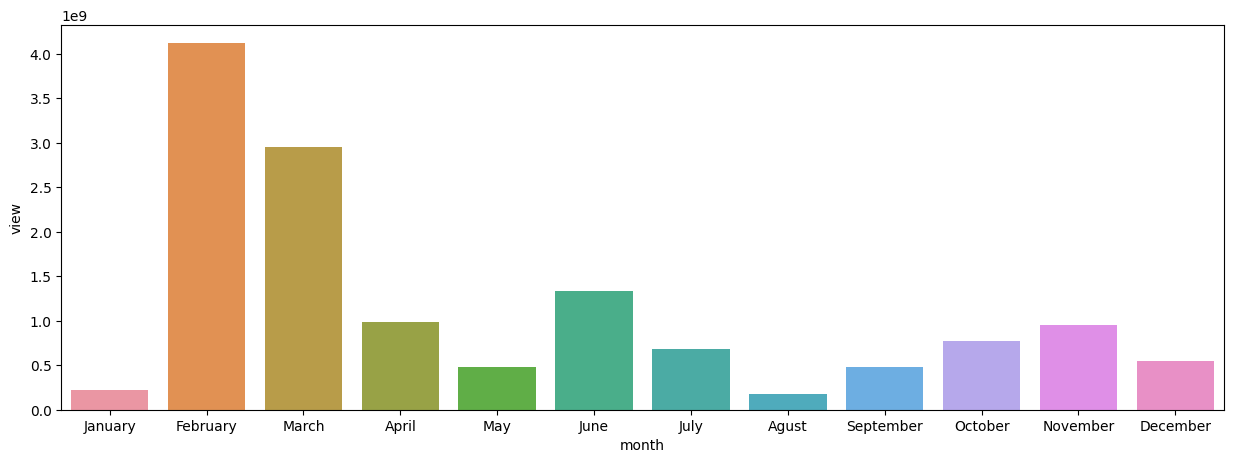

In [144]:
plt.figure(figsize=(15,5))
sns.barplot(month_df, x='month', y='view')

### Busiest Month

In [146]:
month_count = data.groupby('month').count()['title'].tolist()

In [147]:
type(month_count)

list

In [148]:
month_df['event counts'] = month_count

In [149]:
month_df.sort_values(by=['event counts'], ascending=False)

month        view  event counts
1    February  4118536751          2513
2       March  2953481519          1534
5        June  1334032611           562
10   November   949675633           458
3       April   986947025           452
9     October   776581370           388
6        July   676889905           348
11   December   549551997           239
4         May   476184974           226
8   September   481194700           214
7       Agust   178254444           125
0     January   223031468           108

#### most Welcome

In [150]:
most_welcome = []

for i in range(len(month_df)):
    most_welcome.append(round(month_df['view'][i]/month_df['event counts'][i], 2))

In [151]:
most_welcome

[2065106.19,
 1638892.46,
 1925346.49,
 2183511.12,
 2107013.16,
 2373723.51,
 1945085.93,
 1426035.55,
 2248573.36,
 2001498.38,
 2073527.58,
 2299380.74]

In [152]:
month_df['most welcome'] = most_welcome

In [153]:
month_df.sort_values(by=['most welcome'], ascending=False)

month        view  event counts  most welcome
5        June  1334032611           562    2373723.51
11   December   549551997           239    2299380.74
8   September   481194700           214    2248573.36
3       April   986947025           452    2183511.12
4         May   476184974           226    2107013.16
10   November   949675633           458    2073527.58
0     January   223031468           108    2065106.19
9     October   776581370           388    2001498.38
6        July   676889905           348    1945085.93
2       March  2953481519          1534    1925346.49
1    February  4118536751          2513    1638892.46
7       Agust   178254444           125    1426035.55

<AxesSubplot: xlabel='month', ylabel='most welcome'>

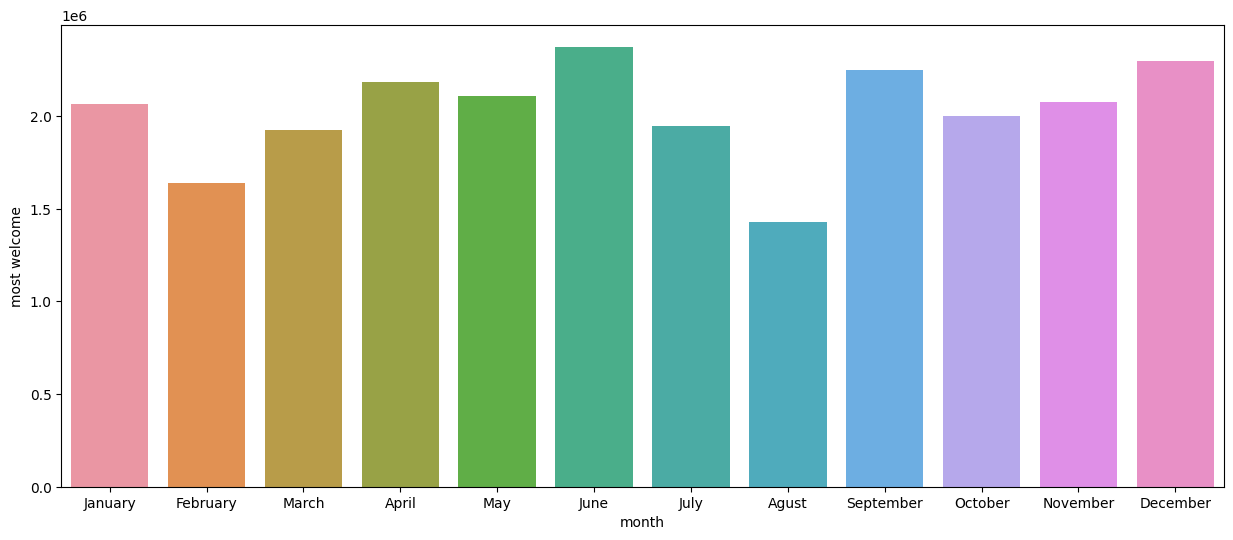

In [154]:
plt.figure(figsize=(15,6))
sns.barplot(month_df, x='month', y='most welcome')

### Most Popular Events

#### Numbers of Event

In [430]:
data.groupby('event').count()['title'].tolist()

477

In [434]:
events_num = len(data.drop_duplicates(subset="event", keep='first'))

In [465]:
events_names = data.drop_duplicates(subset="event", keep='first')

In [475]:
ev = data.groupby('event').count()['title'].tolist()

In [495]:
event_df = pd.DataFrame(columns=['event', 'count'])

In [496]:
event_df['event'] = events_names['event'].tolist()
event_df['count'] = ev

In [497]:
event_df

event  count
0                       TED-Ed      1
1                   TEDxDayton      1
2      TEDxUniversityofGlasgow      2
3                     TED2020       3
4                    TEDxUofSC     37
..                         ...    ...
472                    TED1990     22
473                    TED1984      4
474     Skoll World Forum 2007     15
475  TEDSalon 2007 Hot Science      2
476              TEDSalon 2006      4

[477 rows x 2 columns]

#### Views of Events

In [492]:
event_view = []
for i in event_df['event']:
    event_view.append(data[data['event'] == i]['views'].sum())

In [494]:
len(event_view)

477

In [498]:
event_df['view'] = event_view

In [499]:
event_df

event  count        view
0                       TED-Ed      1  1842369164
1                   TEDxDayton      1     2506900
2      TEDxUniversityofGlasgow      2      569477
3                     TED2020       3    87575748
4                    TEDxUofSC     37      562325
..                         ...    ...         ...
472                    TED1990     22      715285
473                    TED1984      4     1105435
474     Skoll World Forum 2007     15      540867
475  TEDSalon 2007 Hot Science      2     2890887
476              TEDSalon 2006      4     5468204

[477 rows x 3 columns]

In [503]:
most_welcome_event = []

for i in range(len(event_df)):
    most_welcome_event.append(round(event_df['view'][i]/event_df['count'][i]))

#### Most Welcome event

In [504]:
event_df['most welcome'] = most_welcome_event

In [508]:
event_df.sort_values(by=['most welcome'], ascending=False)

event  count        view  most welcome
0                TED-Ed      1  1842369164    1842369164
305             TED2011      1   865835861     865835861
310             TED2006      1   836203677     836203677
309             TED2005      1   652840830     652840830
308             TED2007      2  1020974134     510487067
..                  ...    ...         ...           ...
65   TEDxCambridgeSalon    663     2020811          3048
54           TEDxDublin    840     2390410          2846
74          TEDxCordoba     68      102659          1510
125         TEDxShimizu     47       46040           980
47    Build Back Better      6           0             0

[477 rows x 4 columns]

### Most Tags

In [399]:
data.head(3)

title  \
0  Can you outsmart the apples and oranges fallacy?   
1           The exploitation of US college athletes   
2                         How does ultrasound work?   

                                          transcript             speaker  \
0  Baking apple pie? Discount orange warehouse ha...       Elizabeth Cox   
1  In college sports, American universities are e...          Tim Nevius   
2  In a pitch-black cave, bats can’t see much. Bu...  Jacques Abramowicz   

  speaker_title            speaker_occ  \
0           NaN                    NaN   
1           NaN  College sports lawyer   
2           NaN                    NaN   

                                         speaker_bio  \
0                                                NaN   
1  Tim Nevius is a leading sports lawyer and coll...   
2                                                NaN   

                                           talk_desc       event   views  \
0  It's 1997. The United States Senate has called...      TED-Ed  119359   
1  Colleges and universities in the US make billi...  TEDxDayton  438573   
2  In a dark cave, bats can't see much. But even ...      TED-Ed  140874   

   duration                                               tags  \
0       327  ['education', 'psychology', 'animation', 'TED-...   
1       611  ['sports', 'law', 'education', 'United States'...   
2       295  ['education', 'technology', 'animation', 'TED-...   

                recorded_at  published on  year  month  topic  appearances  
0 2021-04-05 00:00:00+00:00    1617636753  2021      4      1           11  
1 2020-11-10 00:00:00+00:00    1617634131  2020     11      0            1  
2 2021-04-01 00:00:00+00:00    1617290223  2021      4      3            1

## Phase 3: Dealing the raw questionaire and Insights

In [155]:
def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
#     print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [156]:
ex = pd.read_excel("Qouestinaie in Persian.xlsx")

In [157]:
ex.head(5)

استان محل سکونت در مورد این برند چی برات جذابتره؟
0             کرج                               NaN
1           تهران                              اسمش
2          اصفهان       از اینکه محصولات زیادی داره
3          اردبیل                           گستردگی
4           همدان                      کیفیت و تنوع

In [158]:
data = ex.rename(columns={'در مورد این برند چی برات جذابتره؟': 'comments', 'استان محل سکونت':'states'})

In [159]:
data.head()

states                     comments
0     کرج                          NaN
1   تهران                         اسمش
2  اصفهان  از اینکه محصولات زیادی داره
3  اردبیل                      گستردگی
4   همدان                 کیفیت و تنوع

In [160]:
raw_cities = pd.read_excel("iran_cities.xlsx")

In [161]:
raw_cities

State       City        latitude(φ)       longitude(λ)       φ(d)  \
0     اردبيل     اردبيل  38° 14' 59.075" N  48° 17' 39.422" E  38.249744   
1     اردبيل   اصلاندوز  39° 26' 33.371" N  47° 24' 36.076" E  39.442604   
2     اردبيل  آبي بيگلو   38° 17' 5.622" N   48° 33' 9.022" E  38.284897   
3     اردبيل  پارس آباد  39° 38' 44.862" N  47° 54' 35.824" E  39.645794   
4     اردبيل   تازه كند  39° 34' 32.113" N   48° 0' 58.950" E  39.575588   
..       ...        ...                ...                ...        ...   
171  هرمزگان   بندرجاسك  25° 39' 25.186" N   57° 48' 2.282" E  25.656996   
172  هرمزگان   بندرچارك   26° 44' 0.589" N  54° 16' 24.294" E  26.733498   
173  هرمزگان   بندرعباس  27° 11' 33.547" N  56° 17' 29.270" E  27.192652   
174    همدان      همدان  34° 47' 30.520" N  48° 31' 34.126" E  34.791813   
175      يزد        يزد   31° 53' 0.679" N  54° 20' 51.864" E  31.883522   

          λ(d)  
0    48.294285  
1    47.410023  
2    48.552505  
3    47.909950  
4    48.016376  
..         ...  
171  57.800632  
172  54.273415  
173  56.291466  
174  48.526146  
175  54.347740  

[176 rows x 6 columns]

In [162]:
cities = raw_cities

In [163]:
cities.drop(columns=cities.columns[-4:], axis=1, inplace=True)

In [164]:
cities

State       City
0     اردبيل     اردبيل
1     اردبيل   اصلاندوز
2     اردبيل  آبي بيگلو
3     اردبيل  پارس آباد
4     اردبيل   تازه كند
..       ...        ...
171  هرمزگان   بندرجاسك
172  هرمزگان   بندرچارك
173  هرمزگان   بندرعباس
174    همدان      همدان
175      يزد        يزد

[176 rows x 2 columns]

In [165]:
if levenshtein('ازدبیل', 'ازدبیل ') < 2:
    print('yes')

yes


In [166]:
for state in data['states']:
    if pd.notnull(state):
        state = remove_Space(state)
        state = punctuation(state)

In [167]:
state_arr = cities['State'].unique()

In [168]:
state_arr

array(['اردبيل', 'اصفهان', 'البرز', 'ايلام', 'آذربايجان شرقي',
       'آذربايجان غربي', 'بوشهر', 'تهران', 'چهارمحال وبختياري',
       'خراسان جنوبي', 'خراسان رضوي', 'خراسان شمالي', 'خوزستان', 'زنجان',
       'سمنان', 'سيستان وبلوچستان', 'فارس', 'قزوين', 'قم', 'كردستان',
       'كرمان', 'كرمانشاه', 'كهگيلويه وبويراحمد', 'گلستان', 'گيلان',
       'لرستان', 'مازندران', 'مركزي', 'هرمزگان', 'همدان', 'يزد'],
      dtype=object)

### Check states:

In [169]:
for i in range(len(data['states'])):
    for j in range(len(state_arr)):
        if levenshtein(data['states'][i], state_arr[j]) < 3:
            data['states'][i] = state_arr[j]
        else:
            if data['states'][i].find(state_arr[j]) == 0:
                data['states'][i] = state_arr[j]

### Check cities in state column:

In [170]:
for i in range(len(data['states'])):
    for j in range(len(cities['City'])):
        if levenshtein(data['states'][i], cities['City'][j]) < 3:
            data['states'][i] = cities['State'][j]
        else:
            if data['states'][i].find(cities['City'][j]) == 0:
                data['states'][i] = cities['State'][j]

In [171]:
data['states'][23567] # بیرجند

'خراسان جنوبي'

In [172]:
data['states'][33706] # خراان رضوی

'خراسان رضوي'

In [173]:
data['states'][22993]

'خراسان رضوی مشهد'

In [174]:
data['states'][34116]

'استان آذربایجان شرقی'

In [175]:
if 'خراسان رضوی مشهد'.find('مشهد') == 0:
                print('yes')

In [176]:
data['states'][33953] # ِلرستان

'اصفهان'

In [177]:
data['states'][275] # آذربايجانشرقي

'آذربايجان غربي'

### peoples intrests in Survey:

In [178]:
intrest_df = pd.DataFrame(columns=['intrests', 'num'])

In [179]:
intrest = ['کیفیت','جذاب','زیبا','طرح','شکل','اسم', 'صداقت', 'قیمت', 'ایرانی', 'تصمین', 'طراحی', 'ضمانت', 'سادگی']

intrest_df['intrests'] = intrest
intrest_df['num'].replace(to_replace = pd.NA, value = 0, inplace=True)

In [180]:
intrest_df

intrests  num
0     کیفیت    0
1      جذاب    0
2      زیبا    0
3       طرح    0
4       شکل    0
5       اسم    0
6     صداقت    0
7      قیمت    0
8    ایرانی    0
9     تصمین    0
10    طراحی    0
11    ضمانت    0
12    سادگی    0

In [181]:
for cm in data['comments']:
    if pd.notnull(cm):
        cm = remove_Space(cm)
        cm = punctuation(cm)

In [182]:
for i in range(len(data['comments'])):
    splited_cm = str(data['comments'][i]).split(' ')
    for j in range(len(splited_cm)):
        for t in range(len(intrest_df['intrests'])):
            if levenshtein(splited_cm[j], intrest_df['intrests'][t]) < 3:
                intrest_df['num'][t] += 1

In [183]:
intrest_df

intrests    num
0     کیفیت   7860
1      جذاب    385
2      زیبا   3735
3       طرح   3689
4       شکل   4131
5       اسم  11526
6     صداقت    949
7      قیمت   1746
8    ایرانی   3302
9     تصمین    371
10    طراحی   1882
11    ضمانت    900
12    سادگی    190

In [184]:
intrest_df['tehran'] = np.zeros(13)

In [185]:
for i in range(len(data['comments'])):
    if data['states'][i] == 'تهران':
        splited_cm = str(data['comments'][i]).split(' ')
        for j in range(len(splited_cm)):
            for t in range(len(intrest_df['intrests'])):
                if (levenshtein(splited_cm[j], intrest_df['intrests'][t]) < 3):
                    intrest_df['tehran'][t] += 1

In [186]:
intrest_df

intrests    num  tehran
0     کیفیت   7860  2520.0
1      جذاب    385   144.0
2      زیبا   3735  1329.0
3       طرح   3689  1371.0
4       شکل   4131  1527.0
5       اسم  11526  3945.0
6     صداقت    949   301.0
7      قیمت   1746   622.0
8    ایرانی   3302  1231.0
9     تصمین    371   122.0
10    طراحی   1882   705.0
11    ضمانت    900   285.0
12    سادگی    190    68.0

<AxesSubplot: xlabel='intrests', ylabel='num'>

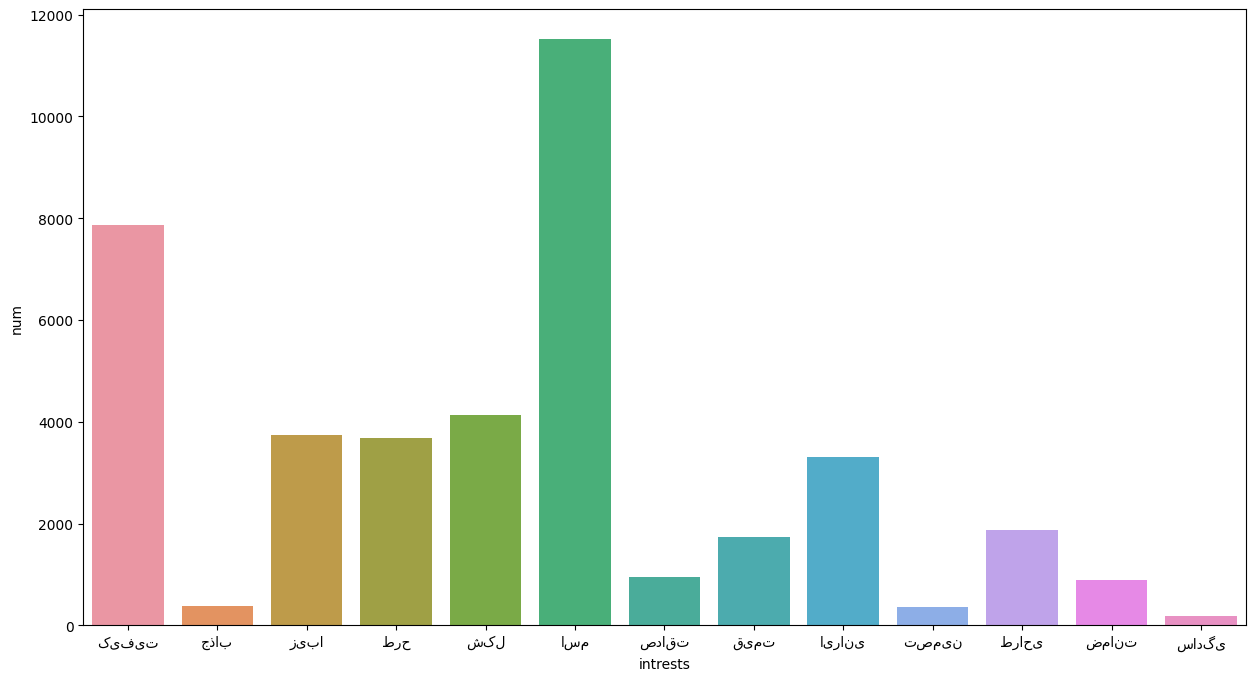

In [196]:
plt.figure(figsize=(15,8))
sns.barplot(intrest_df, x = 'intrests', y='num')

## Web Scraping

In [188]:
import requests
import bs4
from bs4 import BeautifulSoup as bs

In [66]:
from fake_useragent import UserAgent

In [67]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:107.0) Gecko/20100101 Firefox/107.0'}

In [68]:
url = 'https://earth.org'

In [70]:
r = requests.get(url, headers = header)

In [71]:
soup = bs4.BeautifulSoup(r.text,'html.parser')

In [72]:
soup.find_all('div',{'class':'root_nav'})[0].find_all('ul', {'id': 'menu-primary'})[0].find_all('li')[2].find_all('a')[0].text

'Pollution'

In [73]:
cat_num = len(soup.find_all('div',{'class':'root_nav'})[0].find_all('ul', {'id': 'menu-primary'})[0].find_all('li'))

In [74]:
category = []
for i in range(cat_num):
    category.append(soup.find_all('div',{'class':'root_nav'})[0].find_all('ul', {'id': 'menu-primary'})[0].find_all('li')[i].find_all('a')[0].text)

In [75]:
category

['Climate Change',
 'Energy',
 'Pollution',
 'Policy & Economics',
 'Oceans',
 'Biodiversity',
 'Conservation',
 'Solutions',
 'Data Visualisation',
 'ABOUT',
 'SUPPORT']

In [76]:
page_num = len(soup.find_all('div',{'class':'wp-pagenavi'})[0].find_all('a', {'class': 'page larger'}))+1

In [77]:
page_num

10

In [78]:
article_num = len(soup.find_all('div',{'class':'search-filter-results'})[0].find_all('article', {'class': 'latest flex'}))

In [79]:
article_num

8

In [198]:
# Titles = []

# for i in range(cat_num):
#     list_url = url + '/' + category[i]
#     r = requests.get(list_url, headers = header)
#     soup = bs4.BeautifulSoup(r.text,'html.parser')
#     page_num = len(soup.find_all('div',{'class':'wp-pagenavi'})[0].find_all('a', {'class': 'page larger'}))+1
#     for y in range(page_num) :
#         article_num = len(soup.find_all('div',{'class':'search-filter-results'})[0].find_all('article', {'class': 'latest flex'}))
#         for a in range(article_num):
#             Date = soup.find_all('div',{'class':'search-filter-results'})[0].find_all('article', {'class': 'latest flex'})[a].find_all('div', {'class': 'meta'})[0].find_all('span')[0].text
#             if "2020" in Date:
#                 Titles.append(soup.find_all('div',{'class':'search-filter-results'})[0].find_all('article', {'class': 'latest flex'})[a].find_all('div', {'class': 'col col--6 latest__content'})[0].find_all('h3').text)
#         list_url = url + '/' + category[i] + '?sf_paged=' + str(y+1)
#         r = requests.get(list_url, headers = header)
#         soup = bs4.BeautifulSoup(r.text,'html.parser')
#         if ((y+1)%10 == 0):
#             page_num = len(soup.find_all('div',{'class':'wp-pagenavi'})[0].find_all('a', {'class': 'page larger'}))+1

### Unfortunately, due to the disturbances in the Internet, it was not possible to perform Web Scraping